<h1><center> Fourier spectral method for burger's equation

In [10]:
import numpy as np
from numpy.fft import fft, ifft
import scipy as sp
import time
import matplotlib.pyplot as plt
from matplotlib import animation, rc
#from mpl_toolkits.mplot3d import Axes3D
from IPython.core.display import display, HTML
%config InlineBackend.figure_format = 'retina'

<h3> Constitutive equations

$$
    \begin{aligned}
    u_t &+ uu_x = \nu u_{xx} 
    \\
    \implies u_t &+ \frac{1}{2}(u^2)_x = \nu u_{xx}
    \end{aligned}
$$
  
Taking the fourier transform of the partial differential equation, we get

$$
\begin{aligned}
\hat{u}_t = \nu (ik)^2\hat{u} - \frac{1}{2}\hat{u^2}
\end{aligned}
$$
  
Using Forward Euler time marching: 

$$
\begin{aligned}
\hat{u}_{n+1} = \hat{u}_{n} + \{\nu (ik)^2\hat{u} - \frac{1}{2}\hat{u^2}\}dt
\end{aligned}
$$

<h3> Initialize variables

In [25]:
# Discretization in x
N = 128
h = 2*np.pi/N
x = np.arange(0,N)*h

dt = 0.0001    # Timestep
tmax = 2.1       # Maximum time
v = 0.1        # Viscosity

# Fourier discretization
a = np.linspace(0,N/2-1, int(N/2))
b = np.linspace(-N/2+1,-1,int(N/2)-1)
k = np.concatenate((a,[0],b))

k1 = 1j*k
k2 = np.power(k1,2)

<h3> Loop through time using Forward Euler time marching

/Users/prith/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


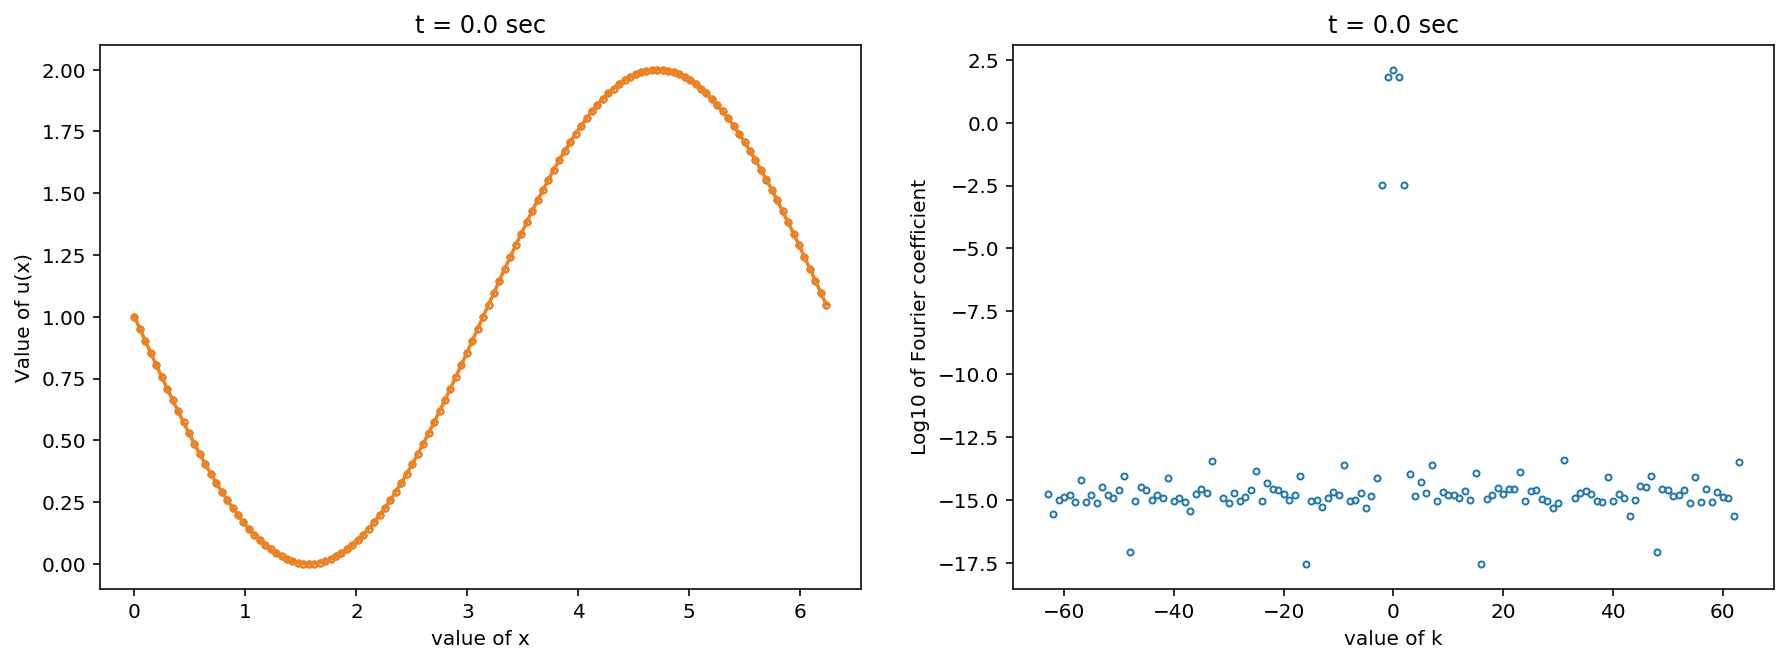

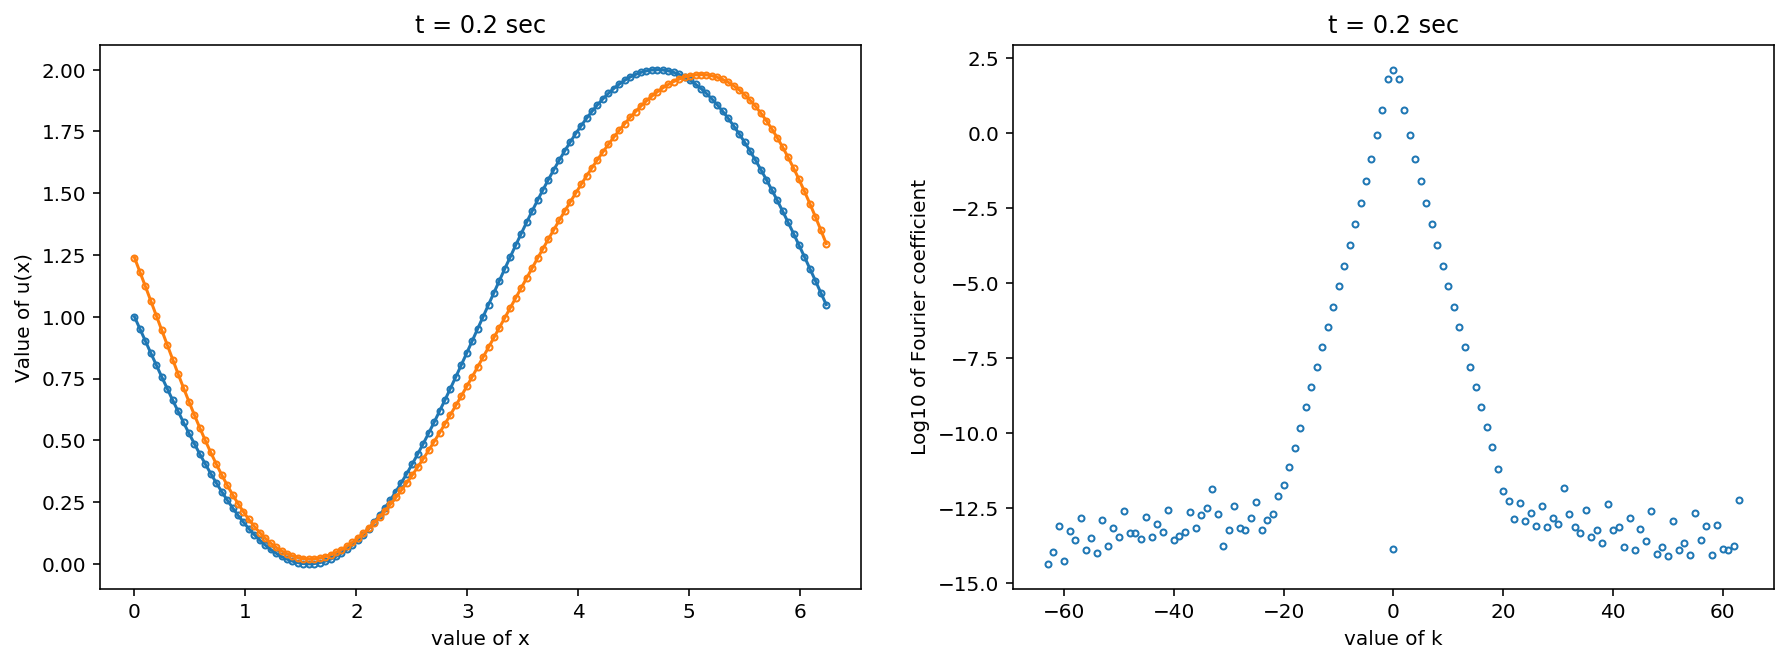

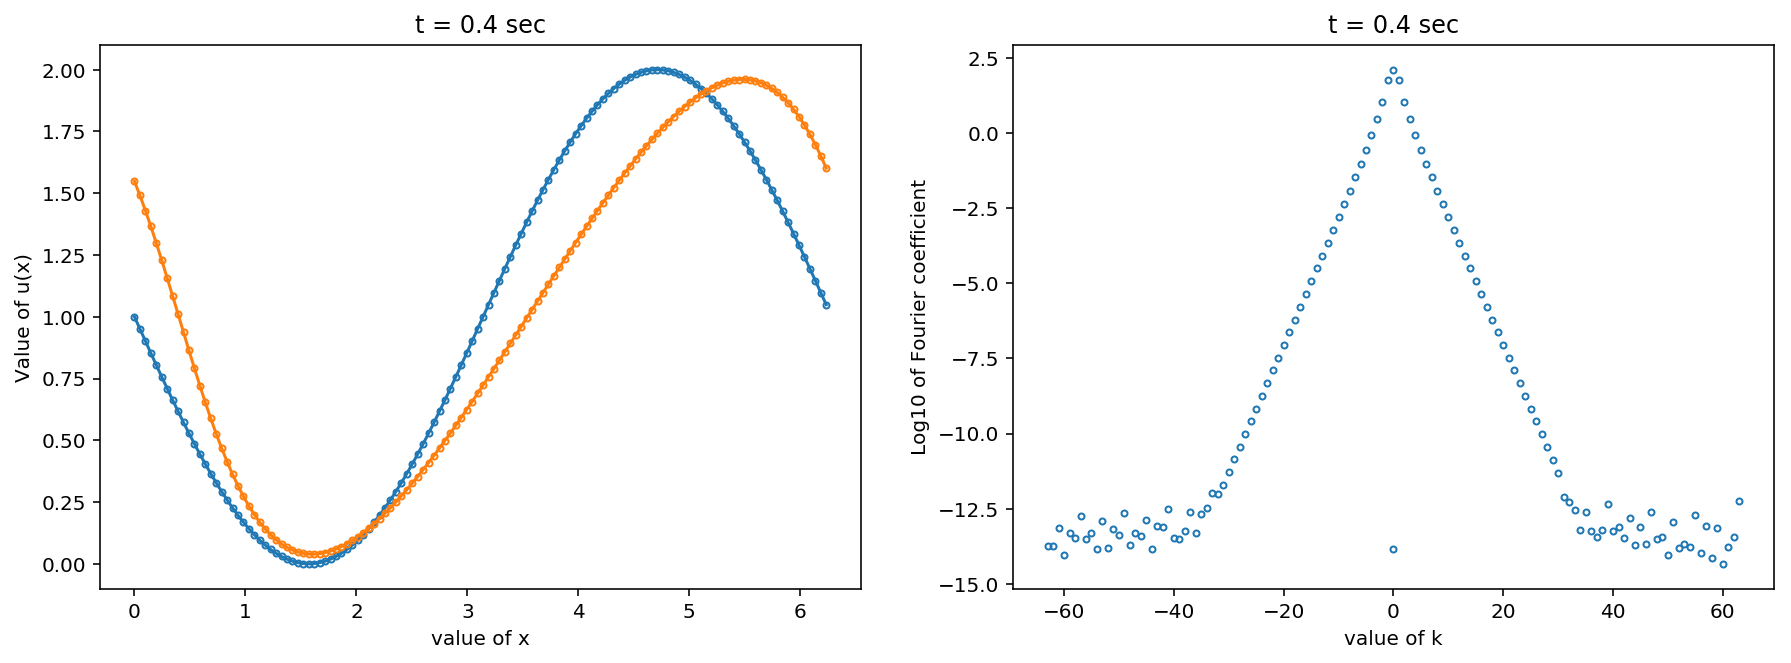

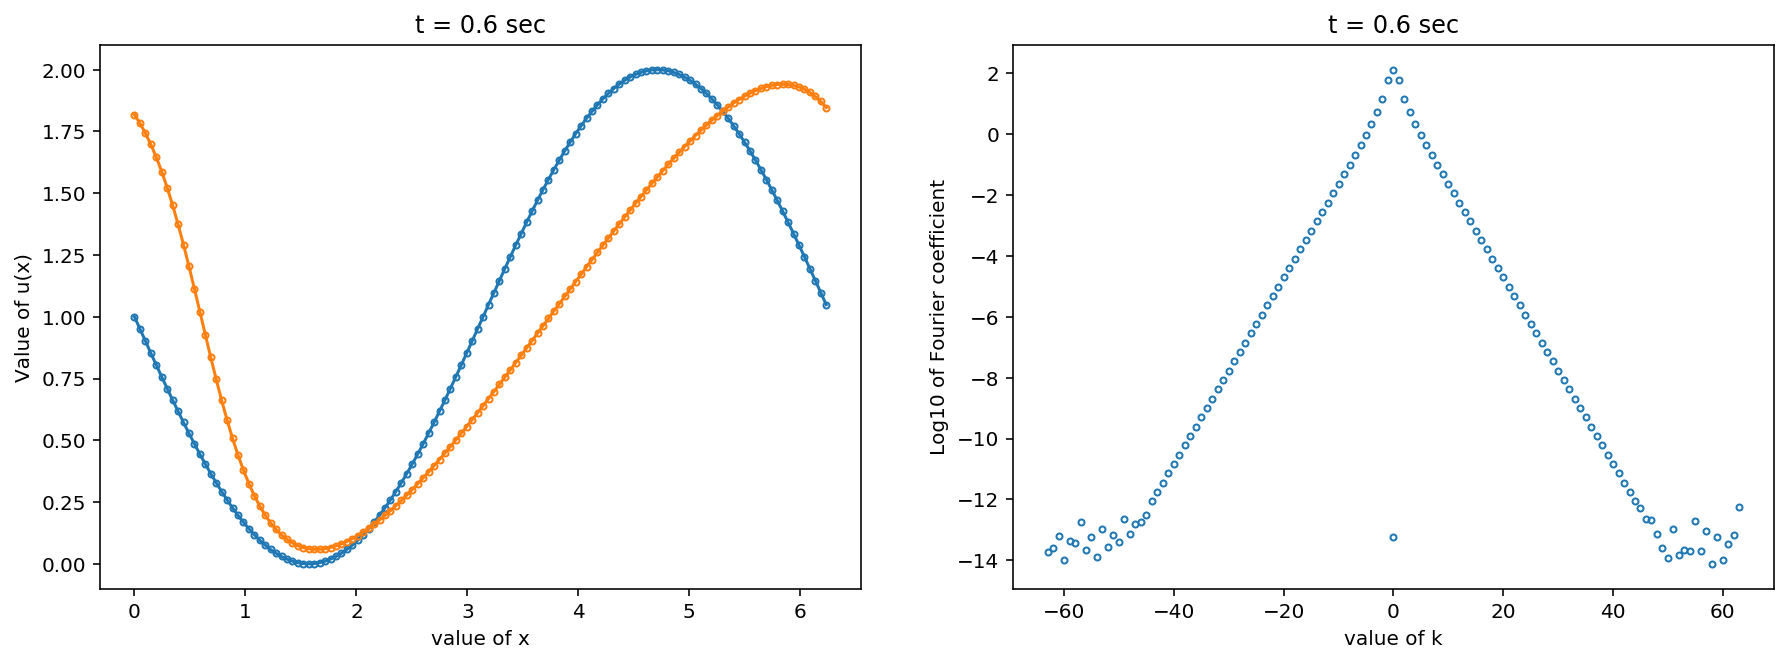

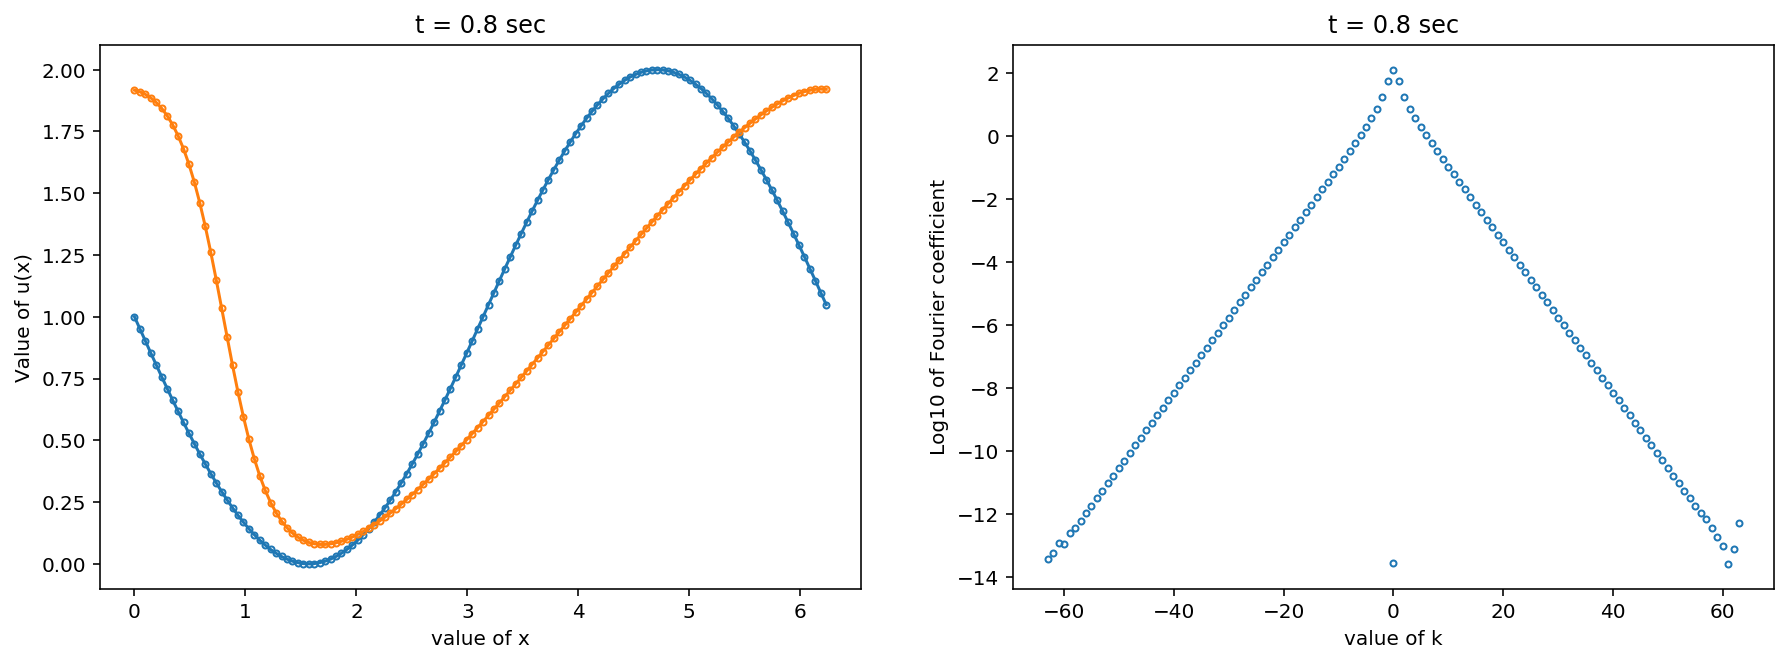

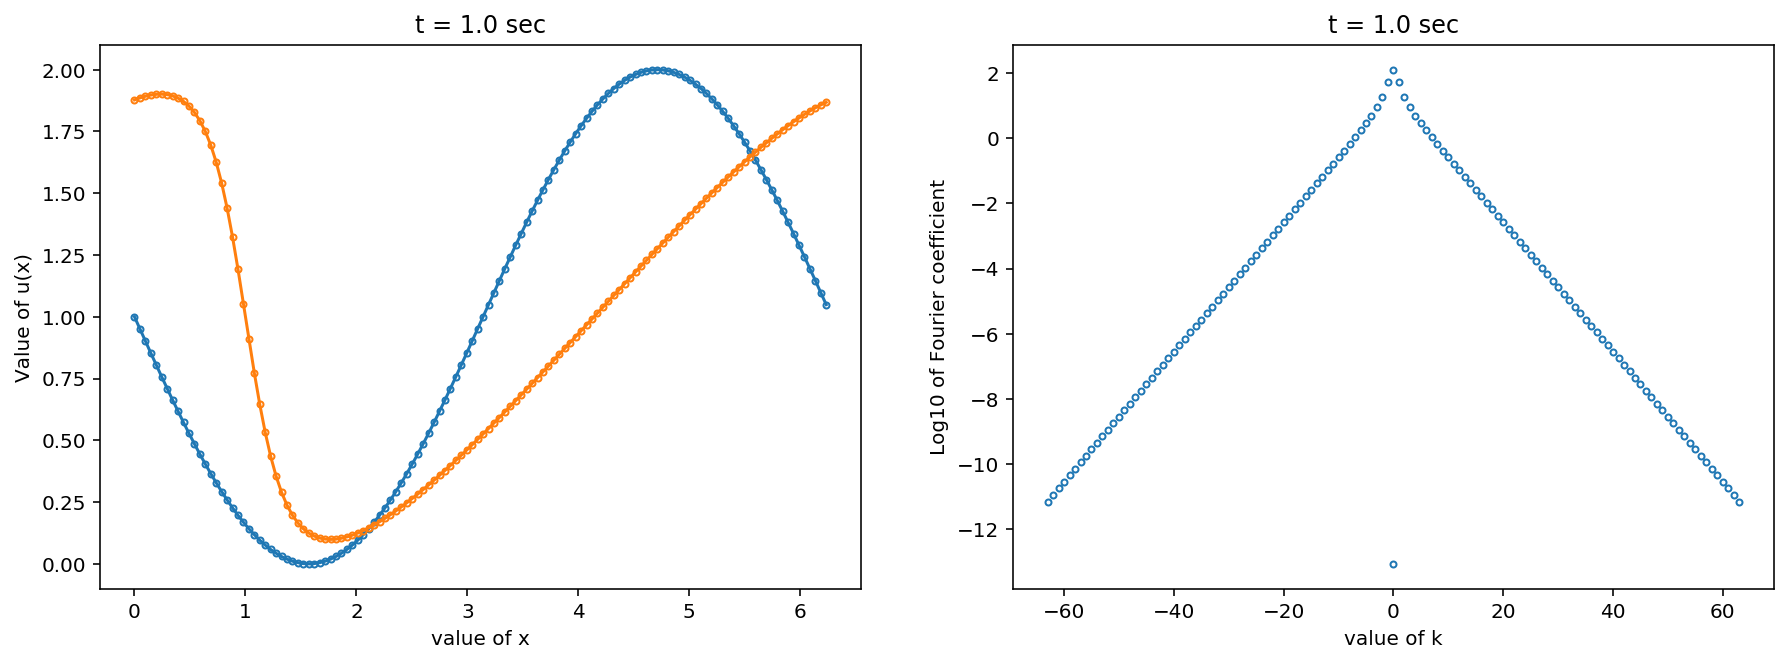

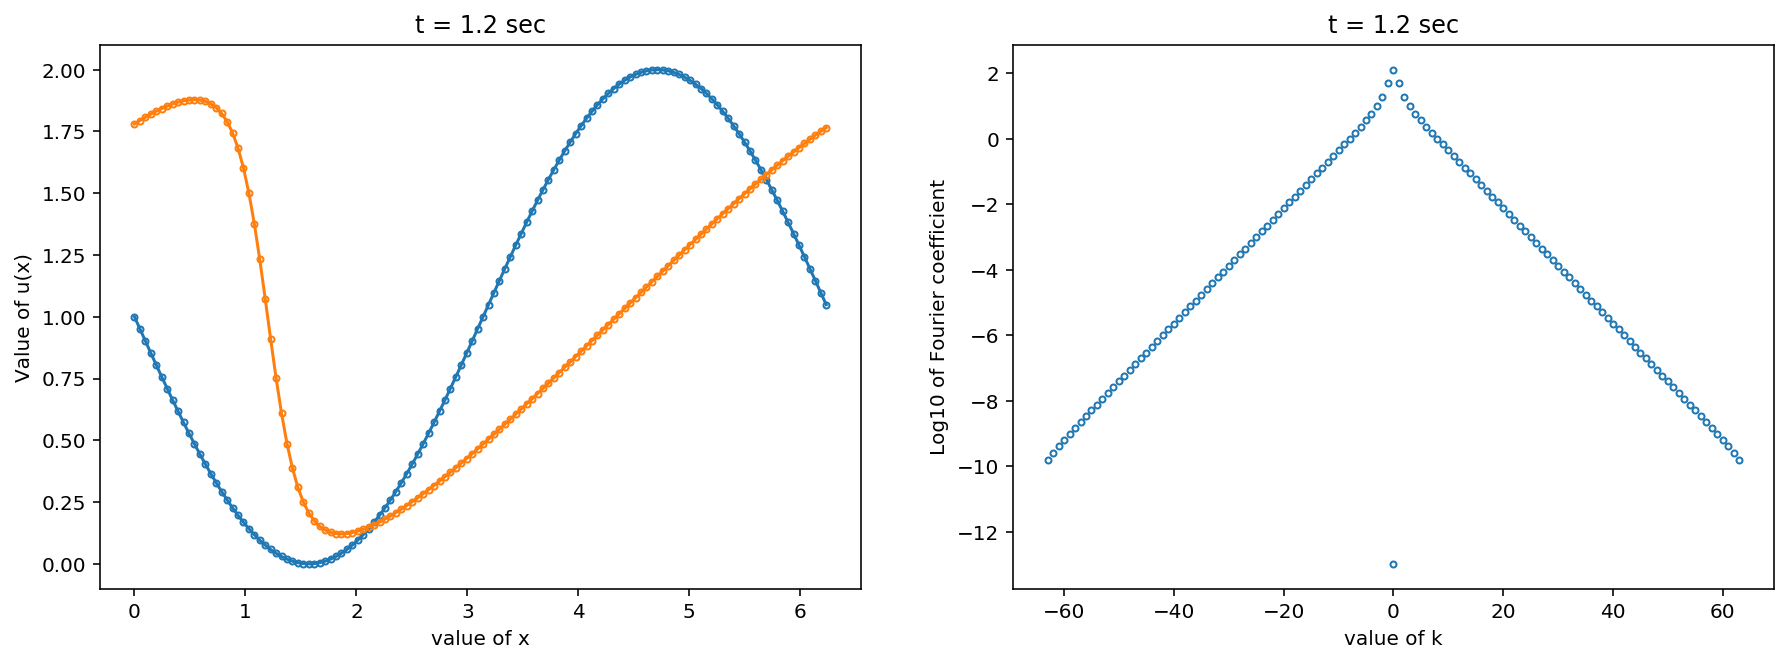

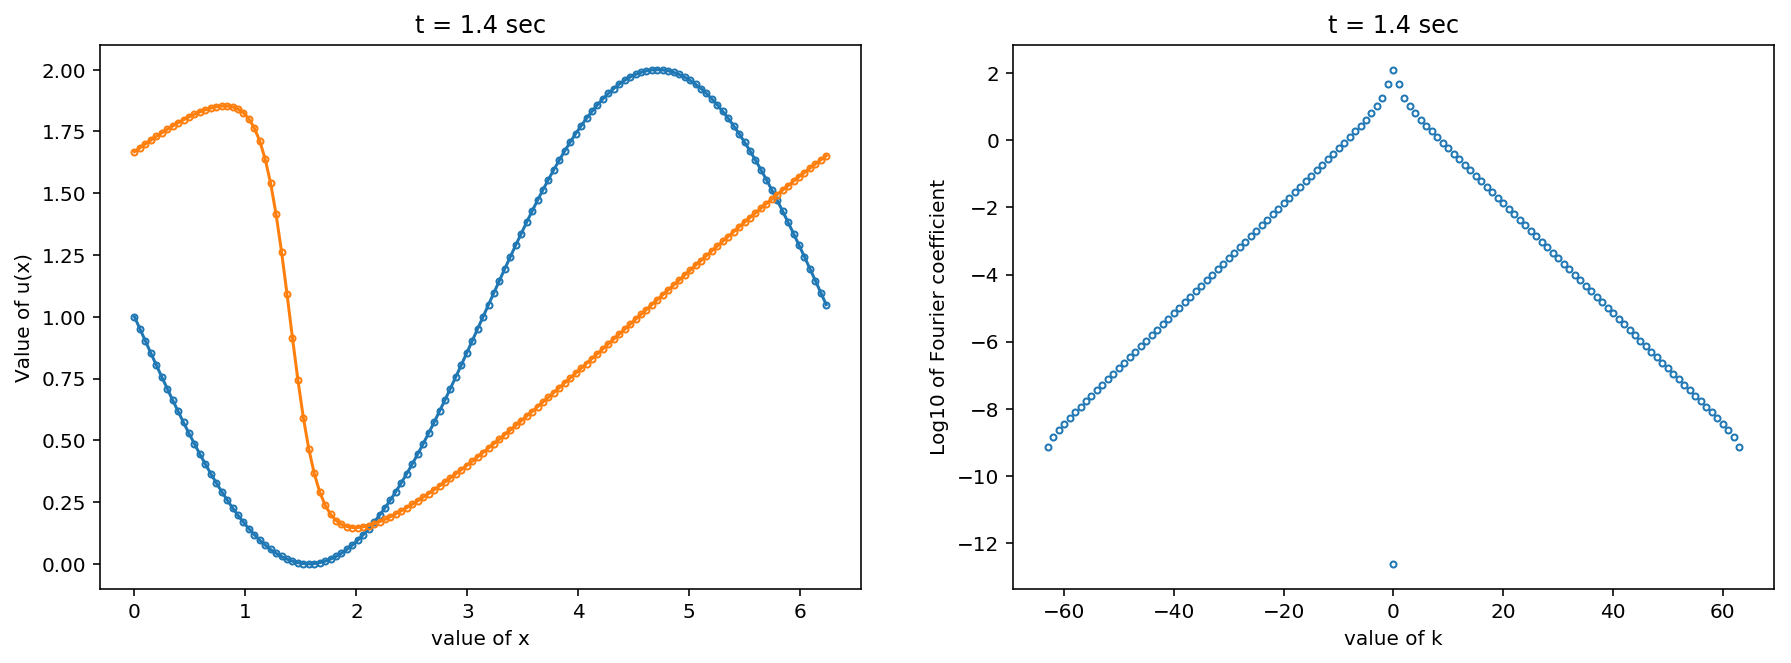

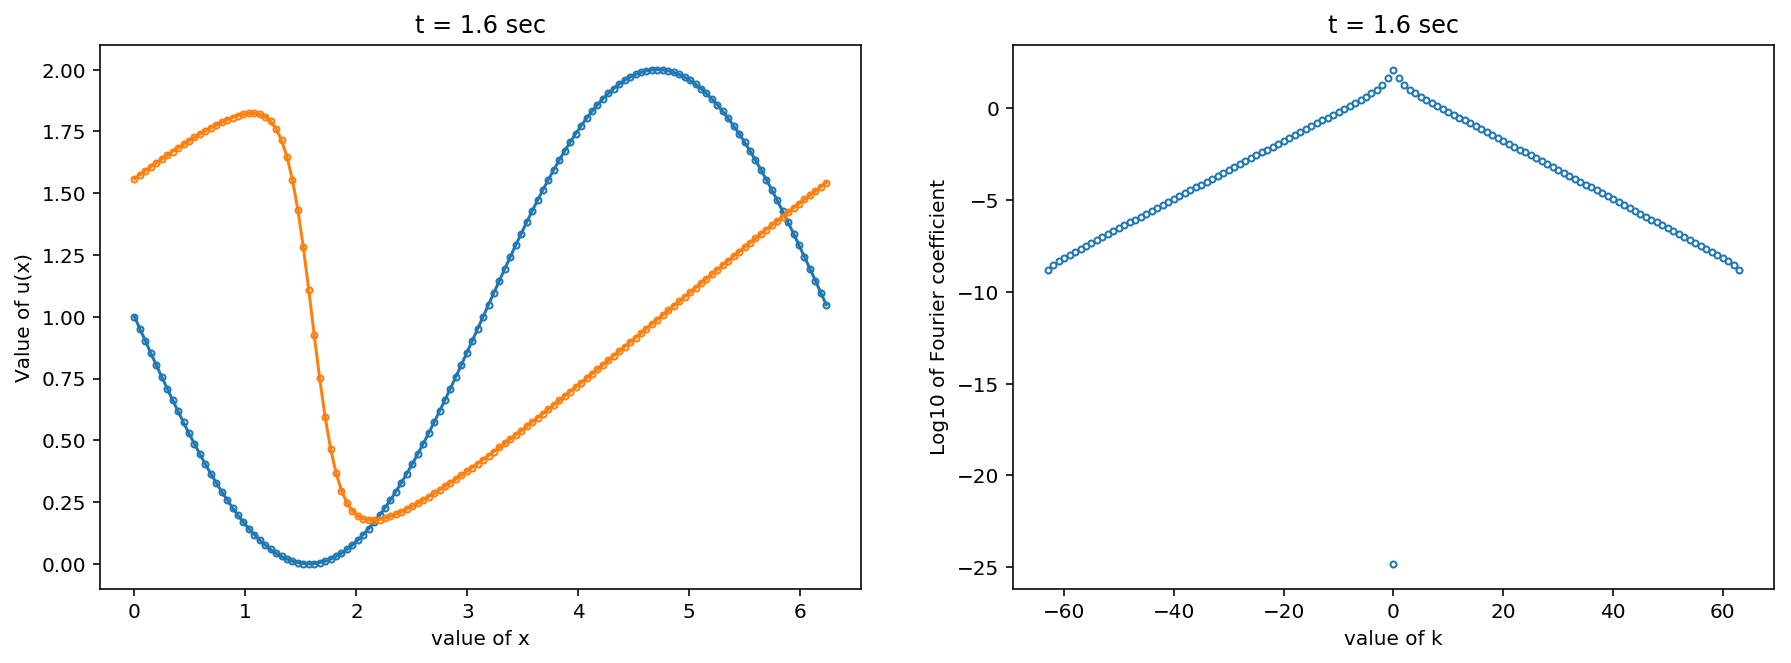

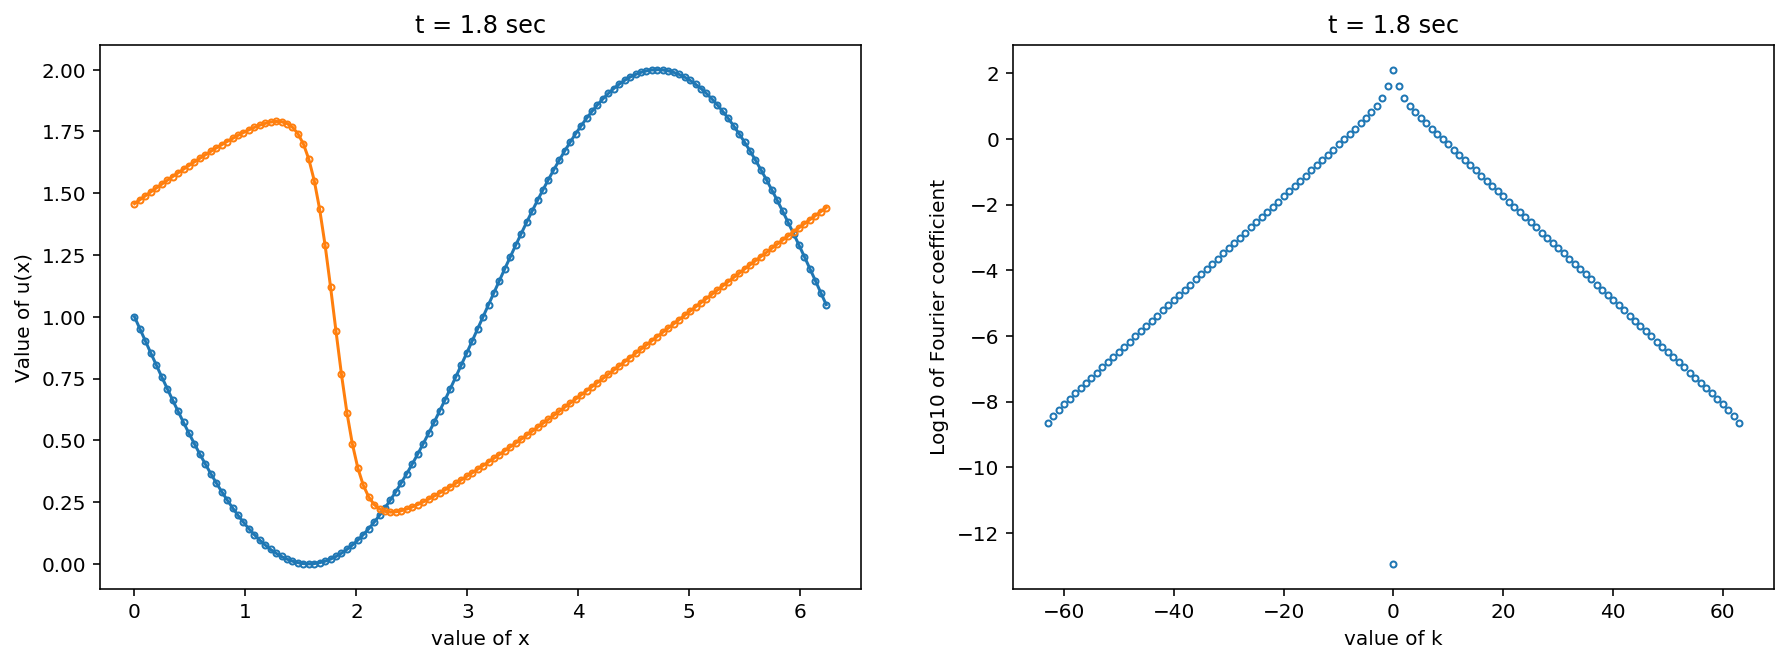

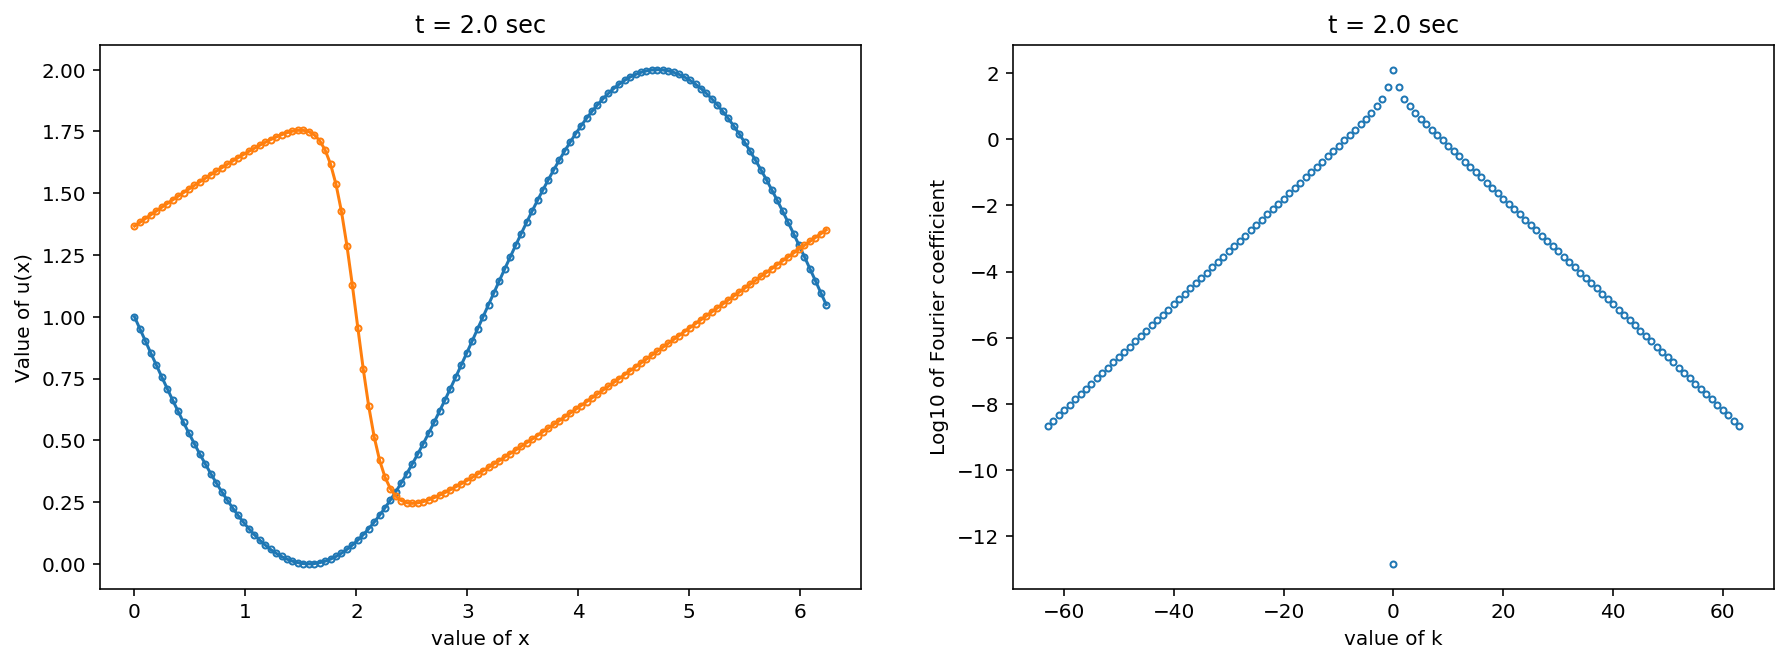

In [26]:
# Initial condition
u_i = 1 - np.sin(x)
u0 = u_i

fig = plt.figure()

# Time loop
for t in range(int(tmax/dt)):
    u1hat = fft(u0) - dt*k1*fft(0.5*(u0**2)) + \
            dt*v*k2*fft(u0)
    u0 = ifft(u1hat)
    
    # Plot figure every 0.2 sec
    if t%2000 == 0:
        fig = plt.figure(figsize=(15,5))
        ax1 = fig.add_subplot(121)
        ax2 = fig.add_subplot(122)
        ax1.plot(x, u_i, 'o-', x, u0.real, 'o-', mfc='none', ms=3)
        ax1.set_xlabel("value of x")
        ax1.set_ylabel("Value of u(x)")
        ax1.set_title("t = %.1f sec" %(dt*t))
        
        ax2.plot(k, np.log10(np.abs(u1hat)), 'o', mfc='none', ms=3)
        ax2.set_xlabel("value of k")
        ax2.set_ylabel("Log10 of Fourier coefficient")
        ax2.set_title("t = %.1f sec" %(dt*t))
        #ax2.plot(x,np.abs(u0))
        #plt.draw()
        plt.show()
        plt.pause(dt)
    